In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/content/Advertising.csv')  # Update path if needed
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
df = df.drop_duplicates()

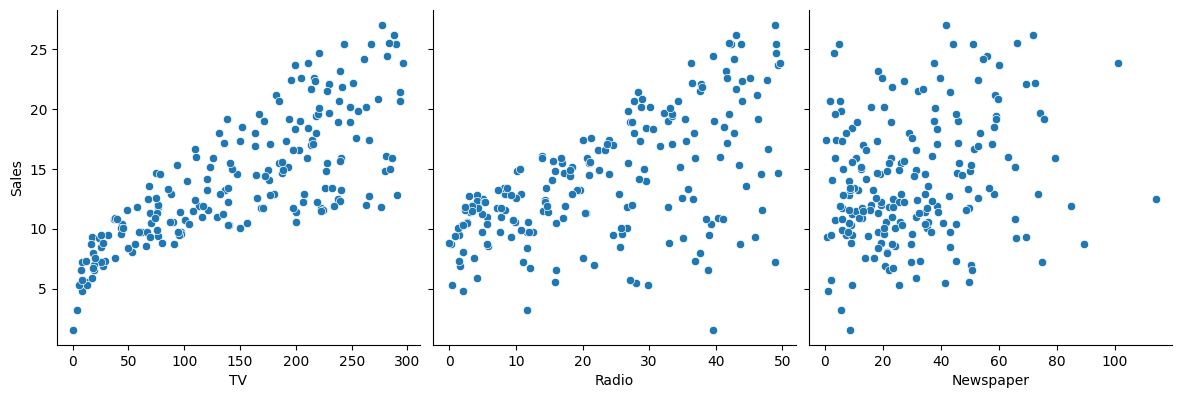

In [7]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


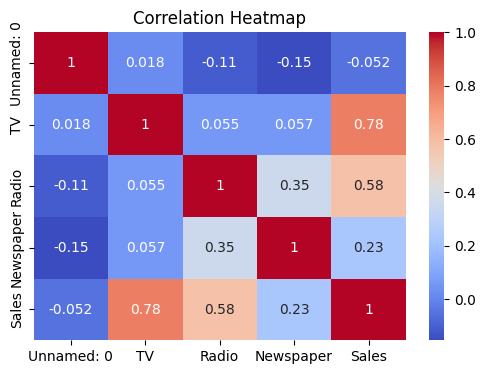

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = df[['TV', 'Radio', 'Newspaper']]  # independent variables
y = df['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


R2 Score: 0.899438024100912
RMSE: 1.78159966153345
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


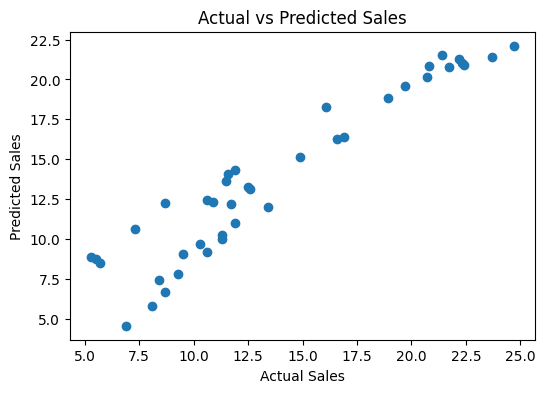

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [13]:
impact = coeff_df / coeff_df.sum() * 100
print("Advertising Impact (%):")
print(impact)

Advertising Impact (%):
           Coefficient
TV           18.898277
Radio        79.935148
Newspaper     1.166574


In [14]:
print("\n Real-Time Sales Prediction System")


new_data = pd.DataFrame({
    'TV': [230.1],
    'Radio': [37.8],
    'Newspaper': [69.2]
})

predicted_sales = model.predict(new_data)
print(f"Predicted Sales for input values {new_data.iloc[0].to_dict()} = {predicted_sales[0]:.2f}")


 Real-Time Sales Prediction System
Predicted Sales for input values {'TV': 230.1, 'Radio': 37.8, 'Newspaper': 69.2} = 20.61
